In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
trainDF = pd.read_csv("../Data/train.csv")
valDF = pd.read_csv("../Data/test.csv")

In [3]:
trainDF

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<Axes: >

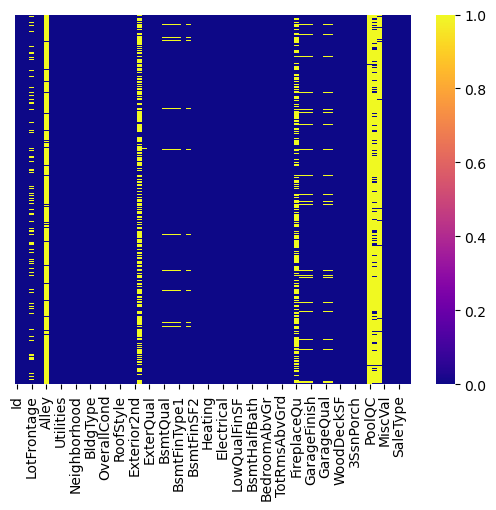

In [4]:
sns.heatmap(data=trainDF.isnull() , cmap='plasma' , yticklabels=False)

In [5]:
trainDF.columns[trainDF.isnull().sum() >= 0.8 * len(trainDF)]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
class PreprocessingHomeData : 
    def __init__(self , df : pd.DataFrame) -> None: 
        self.df = df
        self.df_cols = self.df.columns
        self.preprocessUselessColumns()
        self.preprocessNanValues()
        self.preprocessObjectToFloat()
        # return self.df

    def preprocessUselessColumns(self) -> None :
        try : 
            removableCols = self.df.columns[self.df.isnull().sum() >= 0.8 * len(self.df)]
            self.df.drop(removableCols, inplace=True , axis = 1)
            self.df_cols = self.df.columns
            print('SalePrice' in self.df_cols)
        except KeyError as k :
            pass

    def preprocessNanValues(self) -> None :
        imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        imputer.fit(self.df)
        self.df = pd.DataFrame(imputer.transform(self.df) , columns=self.df_cols)
        print('SalePrice' in self.df_cols)
        print(self.df)

    def preprocessObjectToFloat(self) -> None:
        obj_cols = self.df.columns[self.df.dtypes == object]
        print(obj_cols)
        self.df = self.df.apply(pd.to_numeric , errors='ignore')
        # print(self.df.head(5))
        obj_cols = self.df.columns[self.df.dtypes == object]
        # print(obj_cols)
        self.df = pd.get_dummies(data = self.df , columns=obj_cols , drop_first = True , dtype = float)
        # print(self.df.head(5))
        obj_cols = self.df.columns[self.df.dtypes == object]
        print('SalePrice' in self.df_cols)
        



True
True
        Id MSSubClass MSZoning LotFrontage LotArea Street LotShape  \
0        1         60       RL        65.0    8450   Pave      Reg   
1        2         20       RL        80.0    9600   Pave      Reg   
2        3         60       RL        68.0   11250   Pave      IR1   
3        4         70       RL        60.0    9550   Pave      IR1   
4        5         60       RL        84.0   14260   Pave      IR1   
...    ...        ...      ...         ...     ...    ...      ...   
1455  1456         60       RL        62.0    7917   Pave      Reg   
1456  1457         20       RL        85.0   13175   Pave      Reg   
1457  1458         70       RL        66.0    9042   Pave      Reg   
1458  1459         20       RL        68.0    9717   Pave      Reg   
1459  1460         20       RL        75.0    9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ...             0         0   

C:\Users\ashvi\AppData\Local\Temp\ipykernel_14492\1298318697.py:32: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  self.df = self.df.apply(pd.to_numeric , errors='ignore')


<Axes: >

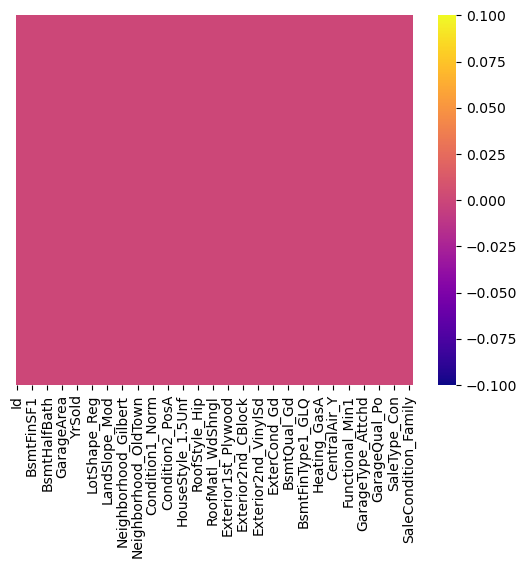

In [7]:
trainDF = PreprocessingHomeData(trainDF)
sns.heatmap(data=trainDF.df.isnull() , cmap='plasma' , yticklabels=False)

In [11]:
trainDF.df
print('SalePrice' in trainDF.df.columns)

True


In [9]:
valDF = PreprocessingHomeData(valDF)

False
False
        Id MSSubClass MSZoning LotFrontage LotArea Street LotShape  \
0     1461         20       RH        80.0   11622   Pave      Reg   
1     1462         20       RL        81.0   14267   Pave      IR1   
2     1463         60       RL        74.0   13830   Pave      IR1   
3     1464         60       RL        78.0    9978   Pave      IR1   
4     1465        120       RL        43.0    5005   Pave      IR1   
...    ...        ...      ...         ...     ...    ...      ...   
1454  2915        160       RM        21.0    1936   Pave      Reg   
1455  2916        160       RM        21.0    1894   Pave      Reg   
1456  2917         20       RL       160.0   20000   Pave      Reg   
1457  2918         85       RL        62.0   10441   Pave      Reg   
1458  2919         60       RL        74.0    9627   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0            Lvl    AllPub    Inside  ...           0             

C:\Users\ashvi\AppData\Local\Temp\ipykernel_14492\1298318697.py:32: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  self.df = self.df.apply(pd.to_numeric , errors='ignore')


In [10]:
trainDF.df.to_csv('../Data/Preprocessed_Train.csv' , index=False)
valDF.df.to_csv('../Data/Preprocessed_Test.csv' , index=False)